In [1]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Devtern project/spam_ham_dataset.csv')

In [2]:
data

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [3]:
data = data[['text','label_num']]

In [4]:
data

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


In [5]:
# Data cleaning (lowercase, Lemmatize, remove stopwords, special characters and extra whitespaces)

import spacy
nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    doc = nlp(text)

    # Lemmatize, remove stopwords, special characters and extra whitespaces
    cleaned_text = ' '.join([token.lemma_.lower() for token in doc if not (token.is_stop or token.is_punct )])

    return cleaned_text

# Apply the cleaning function to the 'text' column
data['text'] = data['text'].apply(clean_text)

<ipython-input-5-93259098c9e5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(clean_text)


In [6]:
data

,text,label_num
0,subject enron methanol meter 988291 \r\n follo...,0
1,subject hpl nom january 9 2001 \r\n attached f...,0
2,subject neon retreat \r\n ho ho ho wonderful t...,0
3,subject photoshop windows office cheap main tr...,1
4,subject indian spring \r\n deal book teco pvr ...,0
...,...,...
5166,subject 10 ft \r\n transport volume decrease 2...,0
5167,subject 3 4 2000 follow nom \r\n hpl t extra 1...,0
5168,subject calpine daily gas nomination \r\n > \r...,0
5169,subject industrial worksheet august 2000 activ...,0


In [7]:
data.isnull().sum()

text         0
label_num    0
dtype: int64

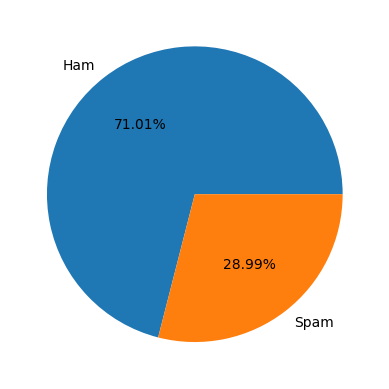

In [8]:
import matplotlib.pyplot as plt

plt.pie(data['label_num'].value_counts(),labels=['Ham', 'Spam'], autopct='%.2f%%')
plt.show()

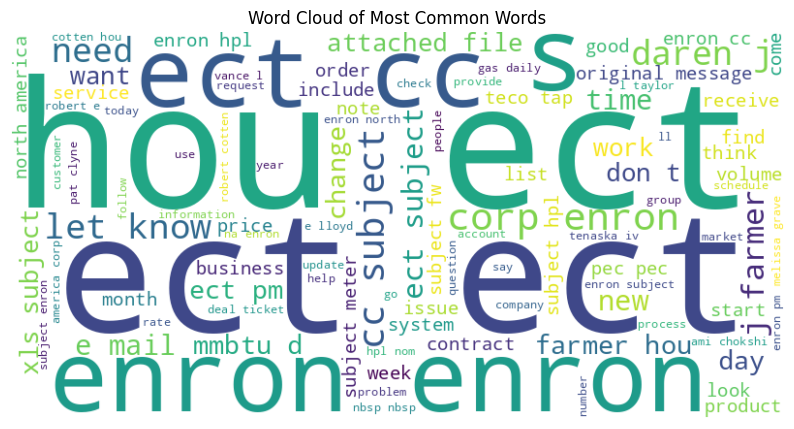

In [9]:
# Create a Word Cloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, random_state=42, max_words=100, background_color='white').generate(' '.join(data['text']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label_num'], test_size=0.2, random_state=42)

In [22]:
# Convert text to vectors using CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train).todense()

# Transform the test data using the vocabulary learned from the training data
X_test_vectorized = vectorizer.transform(X_test).todense()

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the TensorFlow model
model = Sequential([
    Dense(64, input_dim=X_train_vectorized.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [25]:
# Train the model
model.fit(X_train_vectorized, y_train, epochs=5, batch_size=32)

Epoch 1/5
130/130 [==============================] - 8s 53ms/step - loss: 0.1797 - accuracy: 0.9466
Epoch 2/5
130/130 [==============================] - 6s 46ms/step - loss: 0.0216 - accuracy: 0.9964
Epoch 3/5
130/130 [==============================] - 5s 36ms/step - loss: 0.0072 - accuracy: 0.9995
Epoch 4/5
130/130 [==============================] - 7s 51ms/step - loss: 0.0037 - accuracy: 0.9998
Epoch 5/5
130/130 [==============================] - 5s 41ms/step - loss: 0.0020 - accuracy: 1.0000


In [26]:
# Evaluate the model
y_pred = model.predict(X_test_vectorized)
y_pred_binary = (y_pred > 0.5).astype(int)

33/33 [==============================] - 1s 18ms/step


In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model evaluation
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)

print(f'Accuracy: {accuracy}\n')
print(f'Confusion Matrix: \n {conf_matrix} \n')
print(f'Classification Report: \n {classification_rep} \n')


Accuracy: 0.9903381642512077

Confusion Matrix: 
 [[736   6]
 [  4 289]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.98      0.99      0.98       293

    accuracy                           0.99      1035
   macro avg       0.99      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035
 



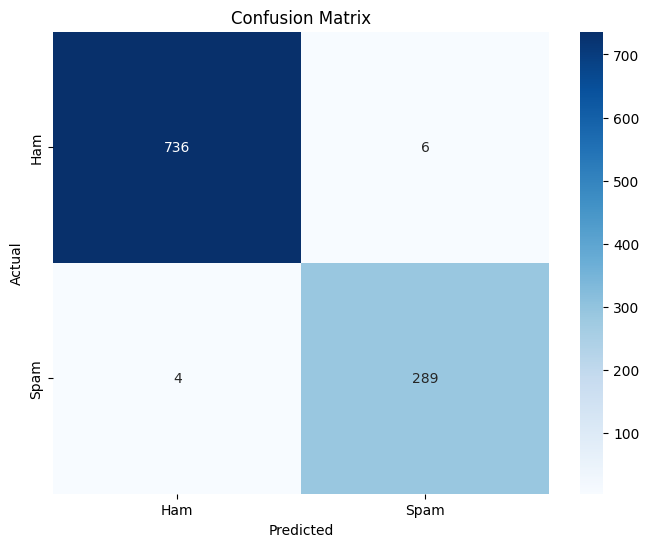

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
